# SETUP

In [279]:
import pandas as pd
import numpy as np
from geotext import GeoText

In [280]:
# define the name of the csv file you want to read in
accounts = './data/accounts.csv'
playbacks = './data/playbacks.csv'
subscriptions = './data/subscriptions.csv'

# ACCOUNTS

In [281]:
# Read accounts (01.10.2020 - 01.10.2022)
df_accounts = pd.read_csv(accounts)
# set column names to lowercase
df_accounts.columns = df_accounts.columns.str.lower()
# show first rows
display(df_accounts.head())

,account_key,postal_code,city,language,country_code,onetime_rental_count,subscription_count
0,60a90104f44414d9036aed7d96d1468a5a9e1d104b6791...,5430,Wettingen,de,CH,0,1
1,a48b28809457e680de54b4b560e00117308431c574aab2...,8706,Meilen,de,CH,0,1
2,7a280859423057ac5f1e0bfc15af602edd23900f3cf7cb...,1005,Lausanne,fr,CH,1,0
3,23e7ac18b391549e95a98d85a3adae1f3f90c4fcc09732...,4436,Oberdorf,de,CH,0,2
4,a39dbaa7972fb67c15db79d4a66cf5d1b94855ae530774...,6005,Luzern,de,CH,8,2


In [282]:
#check basic information
display(df_accounts.shape)
display(df_accounts.dtypes)
display(df_accounts.describe())

(17079, 7)

account_key             object
postal_code             object
city                    object
language                object
country_code            object
onetime_rental_count     int64
subscription_count       int64
dtype: object

,onetime_rental_count,subscription_count
count,17079.000000,17079.000000
mean,1.686867,0.709292
std,3.592025,0.877215
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,106.000000,13.000000


In [283]:
# check null values
df_accounts.isna().sum()

account_key              0
postal_code             13
city                    10
language                56
country_code             0
onetime_rental_count     0
subscription_count       0
dtype: int64

**Cleaning postal code column**

In [284]:
df_accounts.groupby('postal_code').sum()

,onetime_rental_count,subscription_count
postal_code,,
2502,1,0
Das 6315,4,0
-,0,2
00-132,1,0
00-834,1,0
...,...,...
asdf,0,1
b25ee,0,1
ecv1 8ba,0,1


In [285]:
# remove non numeric characters
df_accounts['postal_code_clean'] = df_accounts['postal_code'].str.replace('-', '')
df_accounts['postal_code_clean'] = df_accounts['postal_code_clean'].str.extract('(\d+)')
# fill null-values with 0
df_accounts['postal_code_clean'].fillna(0, inplace=True)
df_accounts.groupby(['postal_code_clean', 'postal_code']).sum().head(20)

onetime_rental_count  subscription_count
postal_code_clean postal_code                                           
0                 -                                0                   2
                  Bern                             3                   3
                  Biel                            27                   0
                  Fribourg                         3                   1
                  Genève                           0                   4
                  Rudolfstette                     0                   2
                  Sierre                           1                   0
                  XXXX                             8                   1
                  asdf                             0                   1
                  rossens                          1                   0
                  K0M1N0                           1                   0
0000              0000                            32                   2
00000             00000                            2                   2
00132             00-132                           1                   0
00168             00168                            1                   0
00185             00185                            0                   1
00500             00500                            1                   0
00834             00-834                           1                   0
01                01                               5                   0
01010000          01010000                         0                   1

In [286]:
# change data type to integer
df_accounts['postal_code_clean'] = df_accounts['postal_code_clean'].astype(int)
df_accounts.dtypes

account_key             object
postal_code             object
city                    object
language                object
country_code            object
onetime_rental_count     int64
subscription_count       int64
postal_code_clean        int64
dtype: object

**Cleaning City Column**

In [287]:
#test geotext
#df_cities = (df_accounts['city']
#      .apply(lambda x: GeoText(x).cities)
#)
#df_cities.head(10)
# does not recognize the cities

In [288]:
# remove numbers
df_accounts['city_clean'] = df_accounts['city'].str.replace('\d+', '')
# remove and replace special characters
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('-', ' ')
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('\.|<', '')
# remove leading and trailing whitespace
df_accounts['city_clean'] = df_accounts['city_clean'].str.strip()
# set city to lowercase for easier comparison
df_accounts['city_clean'] = df_accounts['city_clean'].str.lower()
# zürich cleanup
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('z..?r.ch.*', 'zürich')
# geneva cleanup
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('gen.v.*|genf', 'genève')
# fill null values with 'unknown'
df_accounts['city_clean'].fillna('unknown', inplace=True)

/var/folders/0j/szrk2v_52_bgyh57zj48fk400000gn/T/ipykernel_56679/2064520655.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_accounts['city_clean'] = df_accounts['city'].str.replace('\d+', '')
/var/folders/0j/szrk2v_52_bgyh57zj48fk400000gn/T/ipykernel_56679/2064520655.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('\.|<', '')
/var/folders/0j/szrk2v_52_bgyh57zj48fk400000gn/T/ipykernel_56679/2064520655.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('z..?r.ch.*', 'zürich')
/var/folders/0j/szrk2v_52_bgyh57zj48fk400000gn/T/ipykernel_56679/2064520655.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df_accounts['city_clean'] = df_accounts['city_c

In [289]:
#check results
df_accounts.loc[df_accounts['city_clean'] == 'zürich'].groupby(['city_clean','city']).sum()

onetime_rental_count  subscription_count  \
city_clean city                                                         
zürich      Zürich                              5                   1   
           8005 Zürich                          5                   0   
           8008 Zürich                          1                   0   
           8037 Zürich                          1                   0   
           8046 Zürich                          0                   1   
           8055 Zürich                          1                   0   
           ZURICH                               1                   1   
           Zprich                               1                   0   
           Zuerich                             28                  23   
           Zuerich                             10                   0   
           Zurich                             141                  90   
           Zurich                              11                   8   
           Zurichn                              1                   0   
           ZÜRICH                              24                   5   
           ZÜRICH                               0                   1   
           Zèrich                               0                   1   
           Zúrich                               4                   0   
           Zürich                            4357                1719   
           Zürich                              89                  67   
           Zürich (Schweiz)                     0                   1   
           Zürich (Zürich)                     16                   0   
           Zürich ZH                            5                   0   
           Zürich am See                        4                   1   
           Zürich- Höngg                        2                   0   
           Zürich/Suisse                        0                   1   
           Zürichg                              0                   1   
           Züruch                               7                   0   
           zuerich                             31                   3   
           zuerichq                            38                   0   
           zurich                              19                   9   
           zurich                               1                   1   
           zürich                             322                  82   
           zürich                               2                   3   
           zūrich                               0                   1   

                             postal_code_clean  
city_clean city                                 
zürich      Zürich                       32063  
           8005 Zürich                    8005  
           8008 Zürich                      27  
           8037 Zürich                    8037  
           8046 Zürich                    8046  
           8055 Zürich                    8055  
           ZURICH                         8001  
           Zprich                         8044  
           Zuerich                      176407  
           Zuerich                        8006  
           Zurich                       966782  
           Zurich                        48103  
           Zurichn                        8038  
           ZÜRICH                        72282  
           ZÜRICH                         8004  
           Zèrich                         8006  
           Zúrich                         8053  
           Zürich                     19747308  
           Zürich                       722755  
           Zürich (Schweiz)               8037  
           Zürich (Zürich)               16009  
           Zürich ZH                      8055  
           Zürich am See                  8048  
           Zürich- Höngg                  8049  
           Zürich/Suisse                  8049  
           Zürichg                        8037  
           Züruch           

In [290]:
#check results
df_accounts.loc[df_accounts['city_clean'] == 'genève'].groupby(['city_clean','city']).sum()

onetime_rental_count  subscription_count  \
city_clean city                                                       
genève      geneve                            1                   0   
           GENEVA                             4                   1   
           GENEVE                            40                  17   
           GENEVE                             4                   1   
           GENÈVE                            10                   4   
           GENÈVE                             1                   1   
           GEnève                             2                   0   
           Genev                              1                   0   
           Geneva                           117                  42   
           Geneva                             7                   1   
           Geneva 27                          0                   1   
           Geneve                           165                 107   
           Geneve                            16                   8   
           Genf                               3                   3   
           Genève                          1135                 529   
           Genève                            63                  45   
           Genève 1228                        0                   1   
           Genève 4                           0                   2   
           Genève, Suisse                     0                   1   
           Genève-Acacias                     0                   1   
           Genèves                            1                   0   
           Genéve                             4                   1   
           geneva                             6                   1   
           geneve                            51                  33   
           genf                               0                   1   
           genf                               1                   0   
           genève                            51                  24   
           genèvfe                            0                   1   

                           postal_code_clean  
city_clean city                               
genève      geneve                      1208  
           GENEVA                       2403  
           GENEVE                      30107  
           GENEVE                       1208  
           GENÈVE                       7219  
           GENÈVE                       2413  
           GEnève                       1203  
           Genev                        1205  
           Geneva                      66274  
           Geneva                       3700  
           Geneva 27                    1211  
           Geneve                     184653  
           Geneve                      12036  
           Genf                         6011  
           Genève                     764741  
           Genève                      72288  
           Genève 1228                  1228  
           Genève 4                     1211  
           Genève, Suisse               1203  
           Genève-Acacias               1227  
           Genèves                      1205  
           Genéve                       3614  
           geneva                       4934  
           geneve                      53045  
           genf                         1202  
           genf                         1207  
           genève                      42146  
           genèvfe                      1202

In [291]:
df_accounts.groupby(['city_clean','city']).sum().head(20)

onetime_rental_count  subscription_count  \
city_clean city                                                   
           -                              0                   2   
           1004                           6                   0   
           10245                          1                   0   
           1203                           0                   1   
           1212                           1                   0   
           1700                           3                   1   
           2502                          27                   0   
           3006                           0                   1   
           3013                           3                   2   
           3960                           1                   0   
           7416                           5                   0   
           8964                           0                   2   
           9000                           1                   0   
aachen     Aachen                         6                   1   
           Aachen                         1                   0   
aadorf     Aadorf                         0                   2   
aarau      5000 Aarau                     1                   0   
           Aarau                         81                  33   
           Aarau                          3                   0   
           aarau                          2                   4   

                       postal_code_clean  
city_clean city                           
           -                           0  
           1004                        9  
           10245                     122  
           1203                       32  
           1212                       12  
           1700                        0  
           2502                        0  
           3006                        0  
           3013                        0  
           3960                        0  
           7416                        1  
           8964                        0  
           9000                     8006  
aachen     Aachen                 312414  
           Aachen                  52066  
aadorf     Aadorf                  16710  
aarau      5000 Aarau               5000  
           Aarau                  280000  
           Aarau                   10000  
           aarau                   30000

In [292]:
df_accounts['city_clean'].isna().sum()
# where do empty values come from??

0

In [293]:
df_accounts.groupby(['postal_code_clean', 'city_clean']).sum().head()

onetime_rental_count  subscription_count
postal_code_clean city_clean                                            
0                                                 34                   8
                  accra                            1                   0
                  anonymhausen                     1                   0
                  asdf                             0                   1
                  asdfasdf                         0                   1

In [294]:
# export to csv for tableau eda
# df_accounts.to_csv('accounts_new.csv', sep=',', encoding='utf-8', index=False)

**Check Country_Code**

In [295]:
# show country codes 
display(df_accounts.country_code.nunique())
df_accounts.country_code.unique()

56

array(['CH', 'DE', 'GR', 'LI', 'US', 'AT', 'TH', 'FR', 'GB', 'BE', 'RU',
       'EG', 'HK', 'PT', 'IT', 'SA', 'NZ', 'MX', 'PE', 'CO', 'PL', 'CA',
       'ID', 'ES', 'HU', 'IL', 'NO', 'AU', 'CL', 'NL', 'ZA', 'JO', 'RS',
       'RO', 'IE', 'KR', 'SK', 'AE', 'GH', 'BR', 'MY', 'SE', 'CZ', 'DK',
       'IN', 'JP', 'TR', 'CI', 'EE', 'GA', 'SM', 'WF', 'FI', 'UA', 'SG',
       'IR'], dtype=object)

In [296]:
# check for null values
df_accounts.country_code.isna().sum()

0

In [297]:
df_accounts.country_code.value_counts()
#16.5k DACH / 17k in total

CH    15200
DE     1272
AT      190
FR      112
US       71
GB       46
LI       39
CA       17
IT       13
BE       11
SE        9
AU        8
NO        8
IN        6
NL        6
DK        5
PL        4
PT        4
CO        3
NZ        3
CZ        3
HU        3
IL        3
SK        2
AE        2
EE        2
CL        2
ES        2
RU        2
GR        2
MX        2
ID        2
EG        2
SG        1
UA        1
FI        1
WF        1
SM        1
GA        1
CI        1
TR        1
JP        1
TH        1
HK        1
MY        1
BR        1
GH        1
SA        1
KR        1
IE        1
RO        1
RS        1
JO        1
ZA        1
PE        1
IR        1
Name: country_code, dtype: int64

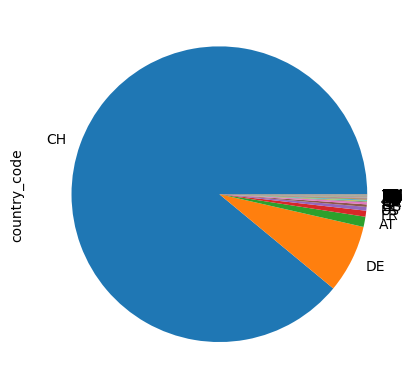

In [298]:
df_accounts.country_code.value_counts().plot(kind='pie');

**Language**

In [299]:
display(df_accounts.language.nunique())
display(df_accounts.language.unique())
display(df_accounts.language.value_counts())

4

array(['de', 'fr', 'en', nan, 'nl'], dtype=object)

de    10942
fr     4286
en     1794
nl        1
Name: language, dtype: int64

In [300]:
# check for null values
df_accounts.language.isna().sum()

56

In [301]:
#fill null values
df_accounts['language'].fillna('na', inplace=True)

In [302]:
df_accounts.groupby('language').sum()

,onetime_rental_count,subscription_count,postal_code_clean
language,,,
de,19546,7600,119303153
en,2350,1119,361492188
fr,6864,3353,22843771
na,50,41,468865
nl,0,1,2394


**Onetime rental and Subscription Count**


In [303]:
display(df_accounts.onetime_rental_count.describe())
display(df_accounts.onetime_rental_count.value_counts())

count    17079.000000
mean         1.686867
std          3.592025
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        106.000000
Name: onetime_rental_count, dtype: float64

0      6837
1      5804
2      1571
3       809
4       514
5       316
6       262
7       178
8       170
9       109
10       85
11       63
12       52
13       47
14       37
15       28
18       24
16       22
17       20
21       17
19       11
20       11
22        8
23        8
30        7
26        7
25        7
29        6
28        6
24        6
27        5
47        4
32        4
31        3
35        3
51        2
37        2
52        2
39        2
45        1
57        1
61        1
38        1
53        1
65        1
44        1
48        1
106       1
79        1
Name: onetime_rental_count, dtype: int64

In [304]:
display(df_accounts.subscription_count.unique())
display(df_accounts.subscription_count.value_counts())
#most have no subscription (assumption: onetime-viewer and gifted movie?)

array([ 1,  0,  2,  3,  6,  4,  5,  7, 11,  8, 12,  9, 13])

0     8103
1     6776
2     1613
3      412
4       96
5       36
7       19
6       13
8        7
11       1
12       1
9        1
13       1
Name: subscription_count, dtype: int64

In [305]:
#Check for accounts with no subscription
#display(df_accounts.subscription_count.unique())
df_accounts['subscription_count'].apply(lambda x: True if x == 0 else False).value_counts()

False    8976
True     8103
Name: subscription_count, dtype: int64